In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from root_pandas import read_root
from matplotlib import rc
from numpy import inf

rc('text', usetex=True)

Welcome to JupyROOT 6.15/01


In [2]:
def applyCut(inputDataframe, cut, text=None):
    dataframe = inputDataframe
    nbeforecut = dataframe.shape[0]
    cutDataframe = dataframe.query(cut)
    if text:
        print text, cutDataframe.shape[0], ' fraction kept: %2.1f'%(100.0*float(cutDataframe.shape[0])/nbeforecut)
    return cutDataframe

In [3]:
def getJetData(inputFiles):
    
    cols = []
    scalar = []
  
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')

    scalar.append('e_eta')
    scalar.append('e_theta')
    scalar.append('e_p')
    scalar.append('e_pt')

    #cols.append('n_total')
    #cols.append('jet_eta')
    #cols.append('jet_theta')
    cols.append('jet_p')
    cols.append('jet_pt')
    cols.append('jet_qt')
    cols.append('jet_dphi')
    cols.append('jet_z')
    #cols.append('dphi_e_jet')
    #cols.append('dR_q_jet')
    
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [4]:
def printSummary(df):
    print df['e_pt'].mean(), ' mean lepton pt'
    print df['y'].mean(), ' mean inelasticity'
    print df['jet_p'].mean(), ' mean jet p'
    print df['jet_pt'].mean(), ' mean jet pT'
    print df['jet_pt'].describe()

    print df['x'].mean(), ' mean x'
    print df['Q2'].mean(), ' mean Q2'
    print df['Q2'].describe()
    return

In [5]:
def getData(inputFiles):
    
    cols = []
    scalar = []  
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('e_eta')
    scalar.append('e_theta')
    scalar.append('e_p')
    scalar.append('e_pt')

    
    
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [6]:
def applyCuts(df):
    temp = df
    temp = applyCut(temp, '0.1 < y < 0.85', '0.1 < y < 0.85')
    temp = applyCut(temp, 'Q2>100', 'Q2>100')
    temp = applyCut(temp, 'e_pt>10', 'e_pt >10')
    #temp = applyCut(temp, 'x > 0.05', 'x>0.05')
    temp.eval('logQ2= log(Q2)/2.3025850', inplace=True)
    temp.eval('logx= log(x)/2.3025850', inplace=True)
    return temp

In [7]:
def applyCutsJets(df):
    temp = df
    temp = applyCut(temp, '0.1 < y < 0.85', '0.1 < y < 0.85')
    temp = applyCut(temp, 'Q2>100', 'Q2>100')
    temp = applyCut(temp, 'e_pt>10', 'e_pt >10')
    temp = applyCut(temp, 'jet_pt>5', 'jet_pt>5')
    #temp = applyCut(temp, 'jet_qt<5', 'jet_qt<5')

    #temp = applyCut(temp, 'dphi_e_jet > 2.74', 'dphi_e_jet>3.14159-0.4')
    #temp = applyCut(temp, 'Q2>100.0', ' Q2>100.0')
    
    #temp.eval('dphi = 3.14159-jet_dphi', inplace=True)
    temp.eval('jet_qtnormjetpt= jet_qt/jet_pt', inplace=True)
    temp.eval('jet_qtnormept= jet_qt/e_pt', inplace=True)

    #df = applyCut(df, 'n_total>1', ' n>1')
    return temp

## Get event-level data, get event-level simulation and apply cuts

In [8]:
df = getData(['boosted_jets.root'])
df = applyCuts(df)

mc = getData(['MC_boosted_jets.root'])
mc = applyCuts(mc)


Processed boosted_jets.root in 0.3 seconds
0.1 < y < 0.85 6581  fraction kept: 100.0
Q2>100 6581  fraction kept: 100.0
e_pt >10 3638  fraction kept: 55.3

Processed MC_boosted_jets.root in 0.0 seconds
0.1 < y < 0.85 32311  fraction kept: 100.0
Q2>100 32311  fraction kept: 100.0
e_pt >10 20098  fraction kept: 62.2


## Get electron variables

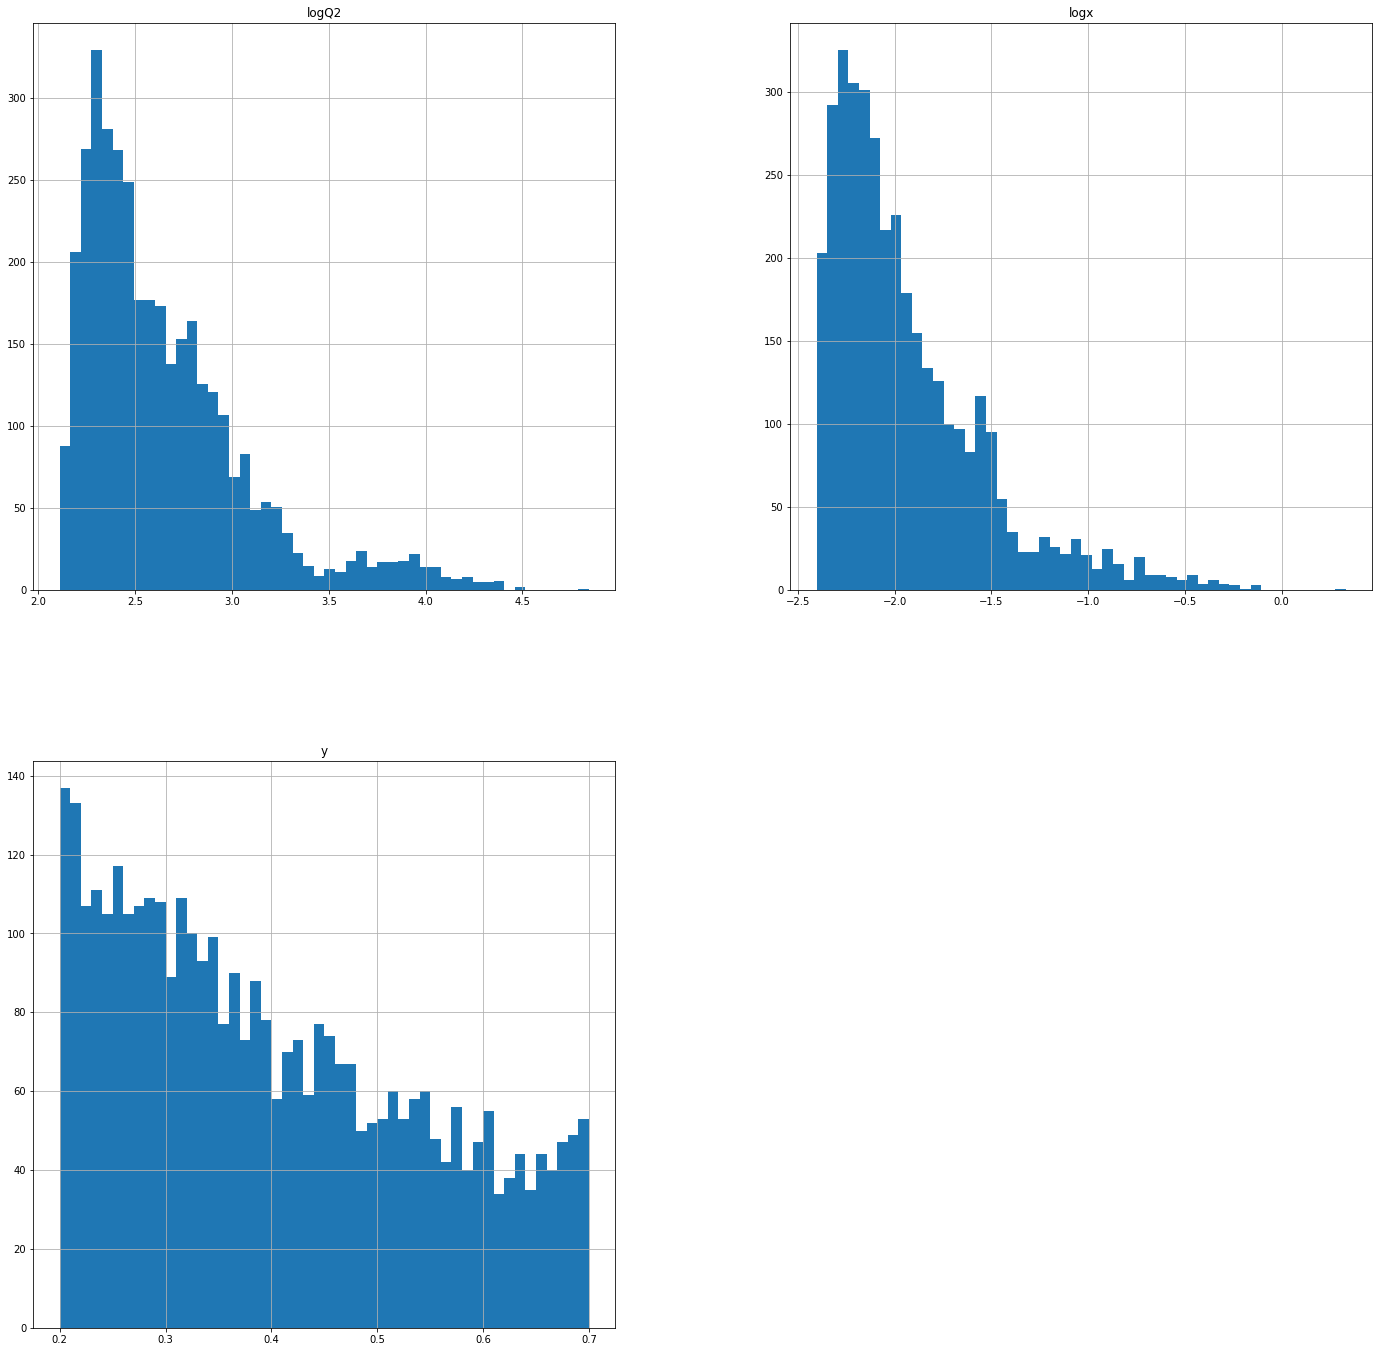

In [9]:
rc('text', usetex=False)
df.hist(figsize=(24,24),bins=50,column=['logx','logQ2','y'])
plt.show()

## Plot electron variables (simulation)

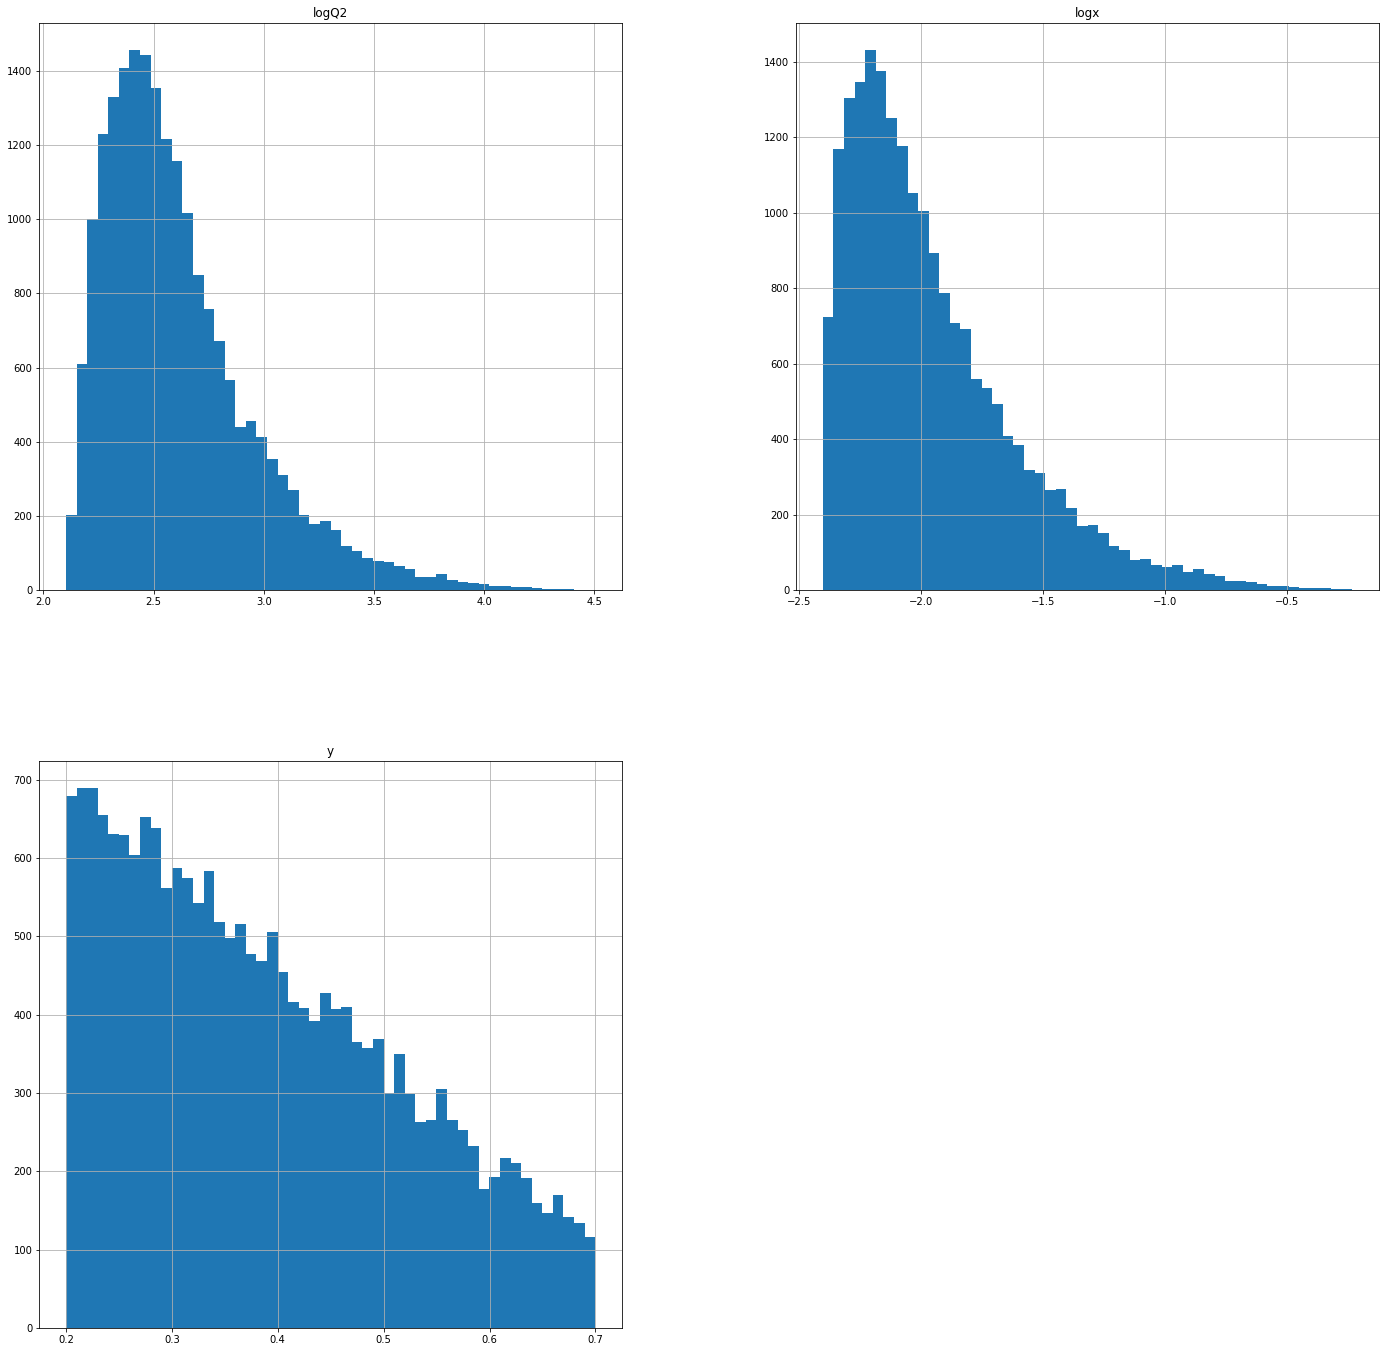

In [10]:
rc('text', usetex=False)
mc.hist(figsize=(24,24),bins=50,column=['logx','logQ2','y'])
plt.show()

## Get Jet data (and simulation) and apply selection 

In [11]:
df_jet      = getJetData(['boosted_jets.root'])
df_jet = applyCutsJets(df_jet)

mc_jet = getJetData(['MC_boosted_jets.root'])
mc_jet = applyCutsJets(mc_jet)


Processed boosted_jets.root in 0.1 seconds
0.1 < y < 0.85 3159  fraction kept: 100.0
Q2>100 3159  fraction kept: 100.0
e_pt >10 1891  fraction kept: 59.9
jet_pt>5 1891  fraction kept: 100.0

Processed MC_boosted_jets.root in 0.6 seconds
0.1 < y < 0.85 36374  fraction kept: 100.0
Q2>100 36374  fraction kept: 100.0
e_pt >10 24529  fraction kept: 67.4
jet_pt>5 24529  fraction kept: 100.0


## Plot variables

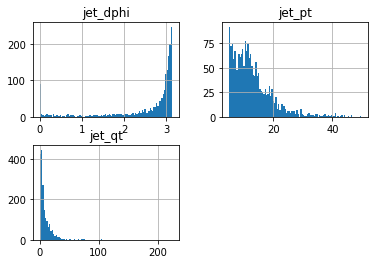

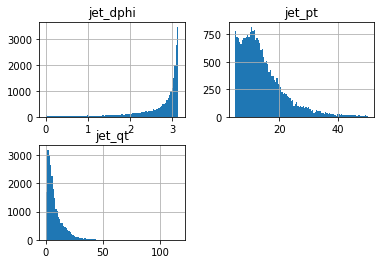

In [12]:
rc('text', usetex=False)
df_jet.hist(bins=100,column=['jet_qt','jet_pt','jet_dphi'])
plt.show()
mc_jet.hist(bins=100,column=['jet_qt','jet_pt','jet_dphi'])
plt.show()

## Peek into data format 

In [13]:
df_jet.head()

,Q2,e_eta,jet_p,e_theta,jet_z,e_pt,jet_qt,jet_pt,e_p,y,x,jet_dphi,__array_index,jet_qtnormjetpt,jet_qtnormept
0,145.612549,-1.359228,9.294407,2.638745,0.788571,10.267633,1.271765,9.057107,21.305567,0.275994,0.005193,3.101160,0,0.140416,0.123862
1,174.857086,-1.300365,10.802114,2.609638,1.111574,11.624952,1.360921,10.336231,22.918997,0.227143,0.007577,3.101689,0,0.131665,0.117069
2,277.841400,-0.882355,9.304800,2.356889,0.236032,12.160895,4.694418,8.678501,17.210052,0.467727,0.005847,2.833943,0,0.540925,0.386026
3,277.841400,-0.882355,8.926324,2.356889,0.601249,12.160895,8.077743,6.009452,17.210052,0.467727,0.005847,2.519171,1,1.344173,0.664239
4,432.527893,-0.732627,14.490120,2.245505,0.549785,16.298828,2.395702,14.067765,20.872143,0.385816,0.011035,3.083946,0,0.170297,0.146986


In [14]:
df.head()

,Q2,e_eta,e_theta,e_pt,e_p,y,x,logQ2,logx
0,256.000244,-1.094540,2.495644,13.853505,23.014151,0.250315,0.010067,2.408241,-1.997111
1,286.551849,-1.036714,2.460027,14.635550,23.230675,0.252494,0.011171,2.457203,-1.951912
2,211.782806,-1.144647,2.525207,12.049562,20.843750,0.314430,0.006630,2.325891,-2.178498
6,145.612549,-1.359228,2.638745,10.267633,21.305567,0.275994,0.005193,2.163199,-2.284566
7,1161.779541,-0.317067,1.882680,28.892864,30.357393,0.281449,0.040631,3.065124,-1.391141


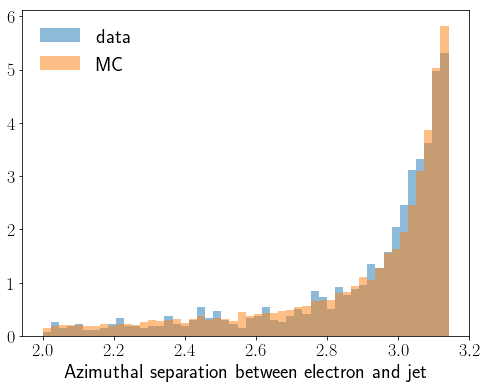

In [24]:
fig = plt.figure(figsize=(8,6))

df_cut = df_jet.query('Q2>200') ## apply selection
plt.hist(df_cut['jet_dphi'],bins=50,range = (2.0,np.pi),alpha=0.5, normed=True,label='data') #plot

df_cut = mc_jet.query('Q2>200') ## apply selection
plt.hist(df_cut['jet_dphi'],bins=50,range = (2.0,np.pi),alpha=0.5, normed=True,label='MC') ## plot

plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.xlabel('Azimuthal separation between electron and jet',fontsize=20)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()